In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
lifting_df = pd.read_csv("Resources/openpowerlifting.csv")
lifting_df.head()

/Users/johnwhendricks/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
0,Abbie Murphy,F,SBD,Wraps,29.0,24-34,F-OR,59.8,60,80.0,...,324.16,286.42,511.15,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
1,Abbie Tuong,F,SBD,Wraps,29.0,24-34,F-OR,58.5,60,100.0,...,378.07,334.16,595.65,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
2,Ainslee Hooper,F,B,Raw,40.0,40-44,F-OR,55.4,56,NaN,...,38.56,34.12,313.97,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
3,Amy Moldenhauer,F,SBD,Wraps,23.0,20-23,F-OR,60.0,60,-105.0,...,345.61,305.37,547.04,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
4,Andrea Rowan,F,SBD,Wraps,45.0,45-49,F-OR,104.0,110,120.0,...,338.91,274.56,550.08,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup


In [3]:
#check for null values
lifting_df.isnull().sum()

Name                     0
Sex                      0
Event                    0
Equipment                0
Age                 665827
AgeClass            636554
Division              8178
BodyweightKg         16732
WeightClassKg        13312
Squat1Kg           1085774
Squat2Kg           1090005
Squat3Kg           1099512
Squat4Kg           1419658
Best3SquatKg        391904
Bench1Kg            923575
Bench2Kg            929868
Bench3Kg            944869
Bench4Kg           1413849
Best3BenchKg        147173
Deadlift1Kg        1059810
Deadlift2Kg        1067331
Deadlift3Kg        1083407
Deadlift4Kg        1414108
Best3DeadliftKg     341546
TotalKg             110170
Place                    0
Wilks               118947
McCulloch           119100
Glossbrenner        118947
IPFPoints           150068
Tested              329462
Country            1034470
Federation               0
Date                     0
MeetCountry              0
MeetState           481809
MeetName                 0
d

In [4]:
#set nulls in best lifts columns to 0
# df1 = lifting_df[lifting_df['Best3SquatKg'].isnull()]
# df2 = lifting_df[lifting_df['Best3BenchKg'].isnull()]
# df3 = lifting_df[lifting_df['Best3DeadliftKg'].isnull()]
# df1['Best3SquatKg'] = 0
# df2['Best3BenchKg'] = 0
# df3['Best3DeadliftKg'] = 0
# lifting_df.iloc[0:6, 0: 20]

In [5]:
lifting_df.count()

Name               1423354
Sex                1423354
Event              1423354
Equipment          1423354
Age                 757527
AgeClass            786800
Division           1415176
BodyweightKg       1406622
WeightClassKg      1410042
Squat1Kg            337580
Squat2Kg            333349
Squat3Kg            323842
Squat4Kg              3696
Best3SquatKg       1031450
Bench1Kg            499779
Bench2Kg            493486
Bench3Kg            478485
Bench4Kg              9505
Best3BenchKg       1276181
Deadlift1Kg         363544
Deadlift2Kg         356023
Deadlift3Kg         339947
Deadlift4Kg           9246
Best3DeadliftKg    1081808
TotalKg            1313184
Place              1423354
Wilks              1304407
McCulloch          1304254
Glossbrenner       1304407
IPFPoints          1273286
Tested             1093892
Country             388884
Federation         1423354
Date               1423354
MeetCountry        1423354
MeetState           941545
MeetName           1423354
d

In [6]:
#removed all rows with na vvalues
no_null_df = lifting_df.dropna()
no_null_df.head()

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
63986,Kylie Beutler,F,SBD,Wraps,23.0,20-23,Juniors 20-23,56.00,56,83.91,...,338.90,299.77,523.61,Yes,USA,WPA,2011-05-21,USA,CA,World Championships
66457,Kaitlynn Naert,F,SBD,Wraps,13.0,13-15,Teen 13-15,103.69,90+,43.09,...,263.24,175.84,359.25,Yes,USA,APA,2015-09-19,USA,MI,Wolverine Open
67030,Carol Moorhead,F,SBD,Wraps,55.0,55-59,Open,74.39,75,79.38,...,273.44,196.41,374.65,Yes,USA,APA,2017-04-22,USA,MO,ShowMe State Raw Championships
67031,Nancy Lowther,F,SBD,Wraps,58.0,55-59,Open,87.09,90,90.72,...,336.19,227.02,449.73,Yes,USA,APA,2017-04-22,USA,MO,ShowMe State Raw Championships
69557,Roger Shaw,M,SBD,Wraps,73.0,70-74,Masters 70-79,74.12,75,147.42,...,546.53,301.14,443.10,Yes,USA,APA,2018-11-17,USA,MO,Midwest Raw Championships


In [7]:
# droping all nulls leads to too little data
no_null_df.count()

Name               14
Sex                14
Event              14
Equipment          14
Age                14
AgeClass           14
Division           14
BodyweightKg       14
WeightClassKg      14
Squat1Kg           14
Squat2Kg           14
Squat3Kg           14
Squat4Kg           14
Best3SquatKg       14
Bench1Kg           14
Bench2Kg           14
Bench3Kg           14
Bench4Kg           14
Best3BenchKg       14
Deadlift1Kg        14
Deadlift2Kg        14
Deadlift3Kg        14
Deadlift4Kg        14
Best3DeadliftKg    14
TotalKg            14
Place              14
Wilks              14
McCulloch          14
Glossbrenner       14
IPFPoints          14
Tested             14
Country            14
Federation         14
Date               14
MeetCountry        14
MeetState          14
MeetName           14
dtype: int64

In [8]:
# returns series with no nulls for squats, not quite what is needed
clean_df = lifting_df['Best3SquatKg'].dropna()
clean_df

0          105.0
1          120.0
3          105.0
4          140.0
5          142.5
           ...  
1423348    200.0
1423349    175.0
1423350    110.0
1423351    160.0
1423353    115.0
Name: Best3SquatKg, Length: 1031450, dtype: float64

In [9]:
# for now, let's ignore null values and just do the analysis

#this is the age series
age = lifting_df['Age']

#this is the Bodyweight series
body_weight = lifting_df['BodyweightKg'] 

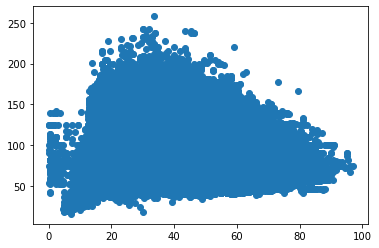

In [10]:
# lets make a scatter plot for body_weight vs age

plt.scatter(age, body_weight)
# too many points, need to change size

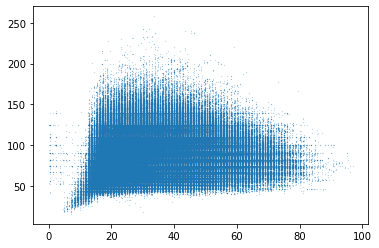

In [11]:
# same scatter plot but size is different
plt.scatter(age, body_weight, s= 0.01)
# still not helpful

In [12]:
# take random sample of first 10K points
import random
N = lifting_df.count()['Name']
delta_age = np.random.normal(size=N)
delta_weight = np.random.normal(size=N)
idx = random.sample(range(N),10000)

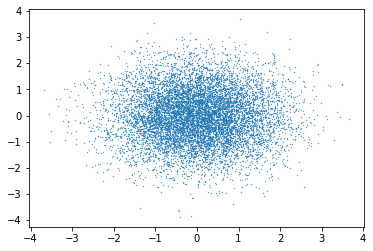

In [13]:
# we now have a random sample plotted with 10k points
# note the axes have changes, i belive they represent standard deviations
plt.scatter(delta_age[idx], delta_weight[idx], s = 0.1)
#don't know how to interpret this graph

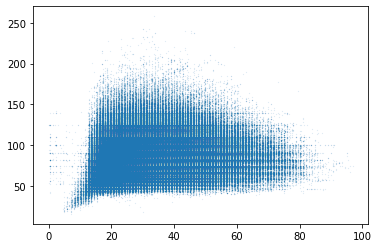

In [14]:
#Let's try making points semitransparent
plt.scatter(age, body_weight, alpha = 0.5, s=0.01)
# doesn't help

In [15]:
# let's try 2D density
import seaborn as sns

# make dataframe for new plot
age_weight_df = pd.DataFrame({
    
    "age" : age,
    "body weight" : body_weight
})

age_weight_df

,age,body weight
0,29.0,59.8
1,29.0,58.5
2,40.0,55.4
3,23.0,60.0
4,45.0,104.0
...,...,...
1423349,60.5,73.5
1423350,55.5,63.5
1423351,62.5,94.4
1423352,63.5,80.8


In [16]:
#this cell took too long to execute

# sns.kdeplot(data=age_weight_df, x="age", y="body weight", cmap="Reds", shade=True)
# plt.show()

<AxesSubplot:xlabel='age', ylabel='body weight'>

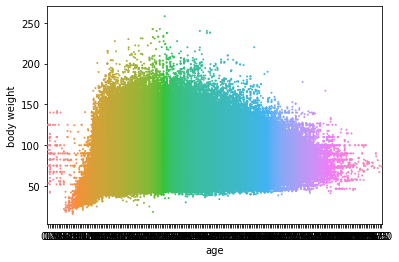

In [17]:
# try jitter?
sns.stripplot(data=age_weight_df, x='age', y='body weight', jitter=0.2,size=2)

In [18]:
lifting_df.head()

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
0,Abbie Murphy,F,SBD,Wraps,29.0,24-34,F-OR,59.8,60,80.0,...,324.16,286.42,511.15,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
1,Abbie Tuong,F,SBD,Wraps,29.0,24-34,F-OR,58.5,60,100.0,...,378.07,334.16,595.65,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
2,Ainslee Hooper,F,B,Raw,40.0,40-44,F-OR,55.4,56,NaN,...,38.56,34.12,313.97,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
3,Amy Moldenhauer,F,SBD,Wraps,23.0,20-23,F-OR,60.0,60,-105.0,...,345.61,305.37,547.04,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
4,Andrea Rowan,F,SBD,Wraps,45.0,45-49,F-OR,104.0,110,120.0,...,338.91,274.56,550.08,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup


In [19]:
squat = lifting_df['Best3SquatKg']
deadlift = lifting_df['Best3DeadliftKg']
bench = lifting_df['Best3BenchKg']

In [20]:
deadlift_vs_squat = pd.DataFrame({
    "squat" : squat,
    "deadlift" : deadlift
}) 

(0.0, 600.0)

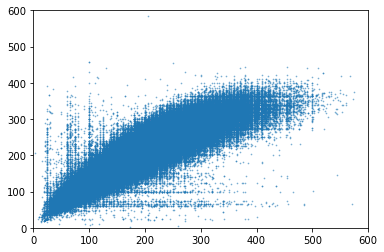

In [21]:
plt.scatter(squat, deadlift, s = 0.5, alpha=0.5)
plt.xlim(0,600)
plt.ylim(0,600)

(0.0, 600.0)

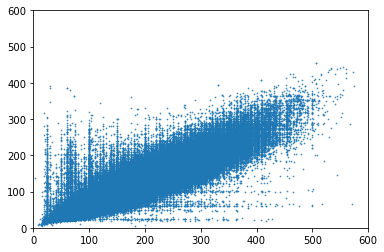

In [22]:
plt.scatter(squat, bench, s = 0.5, alpha=0.8)
plt.xlim(0,600)
plt.ylim(0,600)

In [27]:
lifting_count = lifting_df.groupby('Sex').count()
m_count = lifting_count.loc["M","Name"]
f_count = lifting_count.loc["F","Name"]

In [29]:
print(m_count,f_count)

1060189 363165


In [32]:
total_count = lifting_df.count()['Name']
total_count

1423354

In [37]:
percent_m = 100 * m_count / total_count
percent_f = 
100 * f_count / total_count

([<matplotlib.patches.Wedge at 0x7fb6db931f10>,
 [Text(-0.7655040880850528, 0.7899389160720415, 'Male'),
  Text(0.7655040880850528, -0.7899389160720416, 'Female')],
 [Text(-0.4175476844100287, 0.4308757724029317, '74.5%'),
  Text(0.4175476844100287, -0.43087577240293173, '25.5%')])

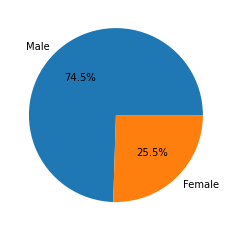

In [39]:
plt.pie([percent_m, percent_f],labels=["Male", "Female"], autopct='%1.1f%%')
